In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB



sns.set()

In [2]:
df = pd.read_csv("assigmnment_data.csv")
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,45,2,Life Sciences,1,2,Female,...,3,1,80,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,4,80,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,23,2,Other,4,4,Male,...,3,2,80,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,3,80,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,3,4,80,6,3,3,2,2,2,2


### understanding the data 

In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
len(df)

1469

In [5]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
NumCompaniesWorked          False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrentRole          False
YearsSinceLastPromotion     False
YearsWithCurrManager        False
dtype: bool

In [6]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
Department                     3
DistanceFromHome              35
Education                      5
EducationField                 6
EmployeeNumber              1469
EnvironmentSatisfaction        4
Gender                         2
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1348
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithCurrManager          18
dtype: int64

---

### basic profiling 

/var/folders/hv/m7d19hld69qb83g8n_7x10tc0000gn/T/ipykernel_95065/1455095412.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(df_depat[i].unique(), rotation=90);
/var/folders/hv/m7d19hld69qb83g8n_7x10tc0000gn/T/ipykernel_95065/1455095412.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(df_depat[i].unique(), rotation=90);


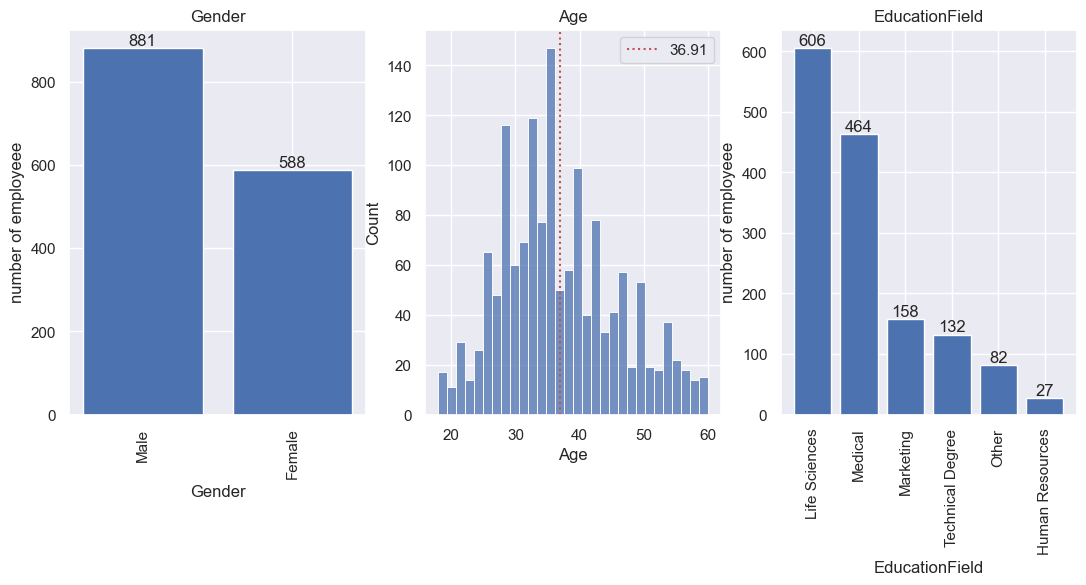

In [7]:
att = ["Gender", "Age", "EducationField"]
fig, ax = plt.subplots(1, 3, figsize=(13, 5))
axes = ax.flatten()
for axes, i in zip(axes, att):
    if i != "Age":

        df_depat = df[i].value_counts().reset_index()
        axes.bar(df_depat[i], df_depat["count"])
        axes.set_ylabel("number of employeee")
        axes.set_xlabel(i)
        axes.set_title(i)
        axes.set_xticklabels(df_depat[i].unique(), rotation=90);
        for count in axes.containers:
            axes.bar_label(count)
    else:

        mean = df[i].mean()
        sns.histplot(data=df, x=i, ax=axes, bins=30)
        axes.axvline(x=mean, linestyle=":", color="r", label=round(mean, 2))
        axes.legend()
        axes.set_xlabel(i)
        axes.set_title(i)
            

In [8]:
df_g = df.pivot_table(
    index="Attrition", columns="Gender", aggfunc="size", fill_value=0
).reset_index()
df_g

Gender,Attrition,Female,Male
0,No,501,732
1,Yes,87,149


In [9]:
xx = df_g['Female'].sum()
xx

np.int64(588)

In [10]:
gone = df_g[df_g["Attrition"] == "Yes"]
print(
    f"{round(((gone['Female']/df_g['Female'].sum())*100).values[0],2)} % of female left the companny  and  {round(((gone['Male']/df_g['Male'].sum())*100).values[0],2)} %"
)

14.8 % of female left the companny  and  16.91 %


In [11]:
df_gg = df[df["Attrition"] == "Yes"]

print(len(df_gg),'people left  which is ',round((len(df_gg)/len(df))*100,2),'%')

236 people left  which is  16.07 %


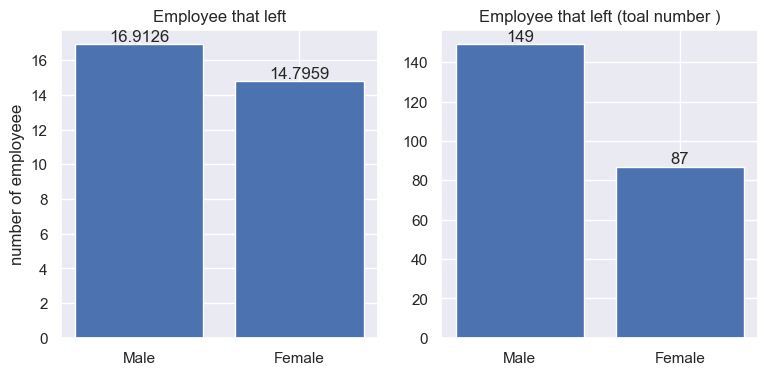

In [12]:
fig, axes = plt.subplots(1,2,figsize=(9, 4))


df_attrit = df[df["Attrition"] == "Yes"]
df_left_gender = df_attrit["Gender"].value_counts().reset_index()

df_Gender = df["Gender"].value_counts().reset_index()

perc = []
for ii,ij in zip(df_left_gender['count'],df_Gender['count']):
    perc.append((ii/ij)*100)
df_left_gender["percentage"] = perc

axes[0].bar(df_left_gender["Gender"], df_left_gender["percentage"])
axes[1].bar(df_left_gender["Gender"], df_left_gender["count"])
axes[0].set_ylabel("number of employeee")
axes[0].set_title("Employee that left")
axes[1].set_title("Employee that left (toal number )")

for i in axes[0].containers:
    axes[0].bar_label(i)

for i in axes[1].containers:
    axes[1].bar_label(i)

### percentages of  (male and female respectively)  who left 
* `16.91%` of   `male` left 
* `14.79%` of `female` left

/var/folders/hv/m7d19hld69qb83g8n_7x10tc0000gn/T/ipykernel_95065/2274012690.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(df_edufield["EducationField"].unique(), rotation=90);


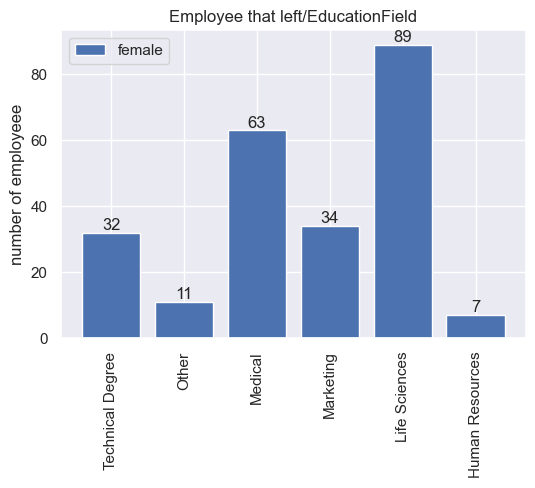

In [13]:
fig, axes = plt.subplots(figsize=(6, 4))
df_left_edufild = df[df["Attrition"] == "Yes"]
df_edufield = df_left_edufild["EducationField"].value_counts().reset_index().sort_values(by='EducationField',ascending=False)


df_gone_ = df_left_edufild[df_left_edufild['Gender'] == 'Male']

axes.bar(df_edufield["EducationField"], df_edufield["count"],label = 'female')

axes.set_ylabel("number of employeee")
axes.set_title("Employee that left/EducationField")
axes.set_xticklabels(df_edufield["EducationField"].unique(), rotation=90);
for i in axes.containers:
    axes.bar_label(i)
axes.legend();


/var/folders/hv/m7d19hld69qb83g8n_7x10tc0000gn/T/ipykernel_95065/3672895505.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(df_gone_male["EducationField"].unique(), rotation=90)
/var/folders/hv/m7d19hld69qb83g8n_7x10tc0000gn/T/ipykernel_95065/3672895505.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(df_gone_male["EducationField"].unique(), rotation=90)


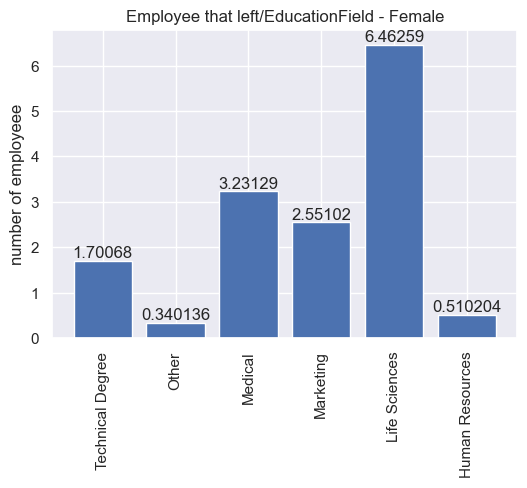

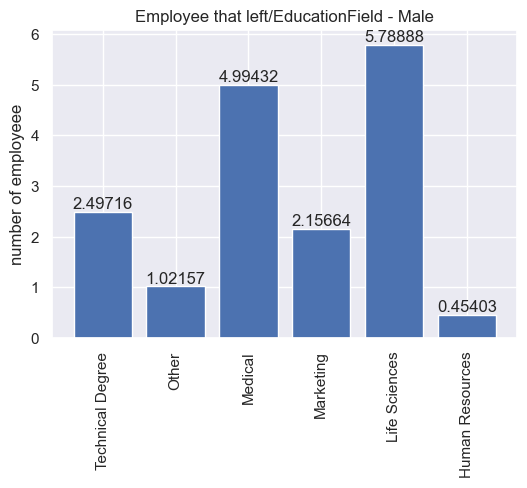

In [14]:
def plot_EducationField(genger):
    fig, axes = plt.subplots(figsize=(6, 4))


    df_gone_emp = df[df["Attrition"] == "Yes"]
    df_gone_emp = df_gone_emp[df_gone_emp['Gender'] == genger]
    df_gone_male = df_gone_emp["EducationField"].value_counts().reset_index()
    df_EducationField = df["EducationField"].value_counts().reset_index()

    df_gone_male =  df_gone_male.sort_values(by='EducationField',ascending=False)
    array_percentage_leaving = []
    for i, j in zip(df_gone_male["count"], df_EducationField["count"]):
        array_percentage_leaving.append((i / df_g[genger].sum()) * 100)

    
    
    df_gone_male["percentage"] = array_percentage_leaving


    # plot 
    axes.bar(df_gone_male['EducationField'], df_gone_male["percentage"])
    axes.set_ylabel("number of employeee")
    axes.set_title(f"Employee that left/EducationField - {genger}")
    axes.set_xticklabels(df_gone_male["EducationField"].unique(), rotation=90)
    for i in axes.containers:
        axes.bar_label(i)

for i in df['Gender'].unique():
    plot = plot_EducationField(i)

#### The employee who has an educational backgroup of life sciences are the onse who left the mos 

In [15]:
# Male attrition
df_gone_emp = df[df["Attrition"] == "Yes"]
df_gone_emp_male = df_gone_emp[df_gone_emp['Gender'] == 'Male']
df_gone_male = df_gone_emp_male["EducationField"].value_counts().reset_index()

array_percentage_leaving_male = []
df_gone_male = df_gone_male.sort_values(by='EducationField', ascending=False)


# Female attrition
df_female_edu = df[df["Attrition"] == "Yes"]
df_female_edu_ = df_female_edu[df_female_edu['Gender'] == 'Female']
df_gone_female = df_female_edu_["EducationField"].value_counts().reset_index()
df_gone_female = df_gone_female.sort_values(by='EducationField', ascending=False)


all_ = df_gone_female.merge(df_gone_male, on='EducationField', how='outer', suffixes=('_female', '_male'))

all_ = all_.sort_values(by='EducationField')


all_


,EducationField,count_female,count_male
0,Human Resources,3,4
1,Life Sciences,38,51
2,Marketing,15,19
3,Medical,19,44
4,Other,2,9
5,Technical Degree,10,22


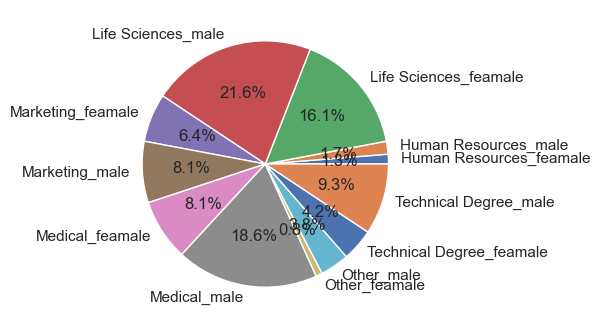

In [16]:
for_pie = {}
for i, iu in all_.iterrows():
    for_pie[f"{iu['EducationField']}_feamale"] = iu['count_female']
    for_pie[f"{iu['EducationField']}_male"] = iu['count_male']


fig, axes = plt.subplots(figsize=(8, 4))
axes.pie(for_pie.values(), labels=for_pie.keys(), autopct="%1.1f%%");


---

## highly correlated column names with  Attrition

In [17]:
df_corri =  df.copy()
df_corri["Attrition"] = df_corri["Attrition"].map({"Yes": 1, "No": 0})
df_corri = pd.get_dummies(df_corri)

correlation_matrix = df_corri.corr()

correlation_with_attrition = correlation_matrix["Attrition"].sort_values(ascending=False).reset_index()

correlation_with_attrition.head()

,index,Attrition
0,Attrition,1.000000
1,DistanceFromHome,0.339861
2,OverTime_Yes,0.244290
3,MaritalStatus_Single,0.176825
4,JobRole_Sales Representative,0.157897


In [18]:
hight_correlation = [i for i in correlation_with_attrition['index'].iloc[1:4]]
hight_correlation

['DistanceFromHome', 'OverTime_Yes', 'MaritalStatus_Single']

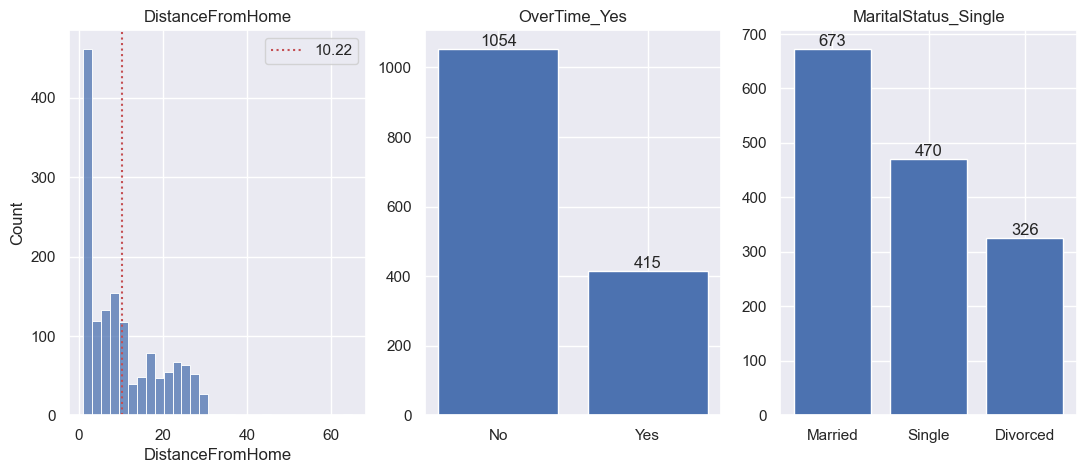

In [19]:
fig, ax = plt.subplots(1,3,figsize=(13, 5))
axes = ax.flatten()
for i,axes in zip(hight_correlation,axes):
    
    try:
        mean = df[i].mean()
        sns.histplot(data=df, x=i, ax=axes, bins=30)
        axes.axvline(x=mean, linestyle=":", color="r", label=round(mean, 2))
        axes.legend()
        axes.set_xlabel(i)
        axes.set_title(i.split("_")[0])
    except KeyError:
        col = i.split("_")[0]
        df_plt =  df[col].value_counts().reset_index()
        
        axes.bar(df_plt[col],df_plt['count'])
        axes.set_title(i)
        for ii in axes.containers:
            axes.bar_label(ii)


### looking at how those feature perform  when the worker left 

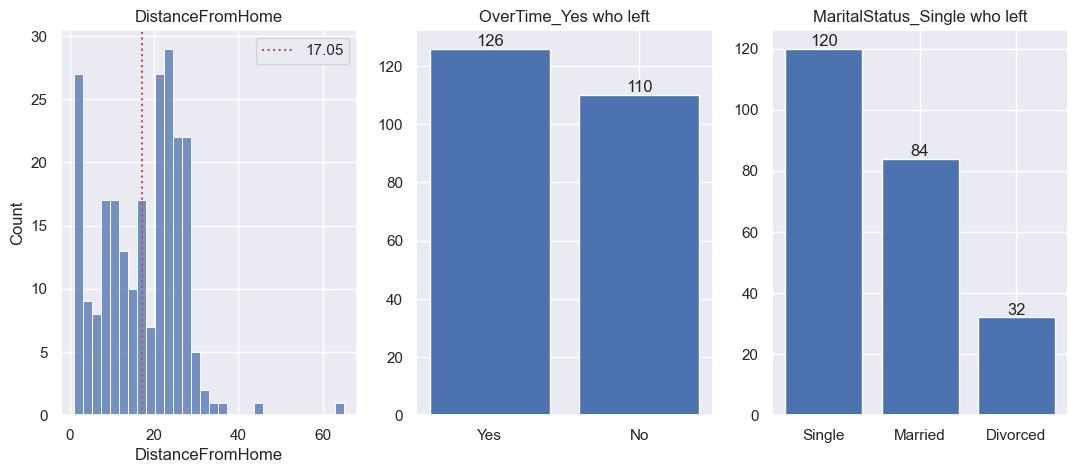

In [20]:
df_left = df[df['Attrition'] == 'Yes']
fig, ax = plt.subplots(1,3,figsize=(13, 5))
axes = ax.flatten()
for i,axes in zip(hight_correlation,axes):
    

    try:
        mean = df_left[i].mean()
        sns.histplot(data=df_left, x=i, ax=axes, bins=30)
        axes.axvline(x=mean, linestyle=":", color="r", label=round(mean, 2))
        axes.legend()
        axes.set_title(i)
    except KeyError:
        col = i.split("_")[0]
        df_plt =  df_left[col].value_counts().reset_index()
        
        axes.bar(df_plt[col],df_plt['count'])
        axes.set_title(f"{i} who left")
        for ii in axes.containers:
            axes.bar_label(ii)


* accoding to the histograph the mean distance of the employee who left is `17.05` which is  higher  that the overall diatance from home of `10`
* the number of worker who do overtime is also higher  for employees who left 
* employee who are single are the ones who left the most 

## model building 

#### Cheking  highly correlated columns 

In [21]:
df_cor = df_corri.corr()
df_cor.head()

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
Age,1.000000,-0.161828,-0.036610,0.208097,-0.011834,0.009017,0.509259,-0.003369,0.497445,0.299362,...,0.050086,0.186259,-0.146147,-0.003835,-0.175673,0.031357,0.084899,-0.118619,-0.026552,0.026552
Attrition,-0.161828,1.000000,0.339861,-0.031561,-0.013272,-0.105421,-0.170762,-0.101311,-0.161608,0.042761,...,-0.082630,-0.088656,0.000414,0.016916,0.157897,-0.090888,-0.089742,0.176825,-0.244290,0.244290
DistanceFromHome,-0.036610,0.339861,1.000000,0.008807,-0.010095,-0.046241,-0.053888,-0.017994,-0.070231,0.012511,...,-0.002125,-0.048745,0.004504,0.023125,0.059261,-0.042766,0.001500,0.036495,-0.091889,0.091889
Education,0.208097,-0.031561,0.008807,1.000000,0.042013,-0.027209,0.101565,-0.011215,0.094935,0.126298,...,-0.005272,0.049709,0.000738,0.053354,-0.091453,-0.002550,-0.001813,0.004208,0.020432,-0.020432
EmployeeNumber,-0.011834,-0.013272,-0.010095,0.042013,1.000000,0.016282,-0.019529,-0.044501,-0.015926,-0.001863,...,-0.013979,-0.013718,-0.017125,0.021127,0.006546,-0.027387,0.055075,-0.034430,0.025940,-0.025940


In [22]:

threshold = 0.7

row_remove = []
for col in df_cor.columns:
    for row in df_cor.index:
        if col != row and abs(df_cor.loc[row, col]) > threshold:
            print(f"{row} and {col}  {df_cor.loc[row, col]:.3f}")
            if '_' not in row:
                if row not in row_remove:

                    row_remove.append(col)




MonthlyIncome and JobLevel  0.950
TotalWorkingYears and JobLevel  0.782
JobLevel and MonthlyIncome  0.950
TotalWorkingYears and MonthlyIncome  0.773
JobLevel and TotalWorkingYears  0.782
MonthlyIncome and TotalWorkingYears  0.773
YearsInCurrentRole and YearsAtCompany  0.759
YearsWithCurrManager and YearsAtCompany  0.769
YearsAtCompany and YearsInCurrentRole  0.759
YearsWithCurrManager and YearsInCurrentRole  0.714
YearsAtCompany and YearsWithCurrManager  0.769
YearsInCurrentRole and YearsWithCurrManager  0.714
BusinessTravel_Travel_Rarely and BusinessTravel_Travel_Frequently  -0.753
BusinessTravel_Travel_Frequently and BusinessTravel_Travel_Rarely  -0.753
JobRole_Human Resources and Department_Human Resources  0.905
Department_Sales and Department_Research & Development  -0.907
JobRole_Sales Executive and Department_Research & Development  -0.733
Department_Research & Development and Department_Sales  -0.907
JobRole_Sales Executive and Department_Sales  0.809
Gender_Male and Gender_Fem

In [23]:
threshold = 0.7  

features_to_remove = set()

for col in df_cor.columns:
    for row in df_cor.index:
        if col != row and abs(df_cor.loc[row, col]) > threshold:
            if row not in features_to_remove and col not in features_to_remove:               
                    features_to_remove.add(col.split('_')[0])

features_to_remove = list(features_to_remove)
features_to_remove 

['JobLevel',
 'YearsInCurrentRole',
 'Department',
 'BusinessTravel',
 'YearsAtCompany',
 'Gender',
 'JobRole',
 'OverTime',
 'MonthlyIncome']

#### data preprocecing for the model 

In [24]:
df_model = df.copy()
df_model["Attrition"] = df_model["Attrition"].map({"Yes": 1, "No": 0})
categorical_cols = [x for x in df.columns if type(df[x][1]).__name__ == 'str']

label_encoder = LabelEncoder()

for col in categorical_cols:
    df_model[col] = label_encoder.fit_transform(df_model[col])



X = df_model.drop(columns=["Attrition"]+features_to_remove)
y = df_model["Attrition"]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### train and testing the models 

In [25]:
models = {
    "Naïve Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(class_weight='balanced'), # deal with imbalance 
}

for name, model in models.items():
    model.fit(X_train_scaled , y_train)
    y_pred = model.predict(X_test_scaled )
    
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)


Naïve Bayes Accuracy: 0.8299
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       247
           1       0.47      0.55      0.51        47

    accuracy                           0.83       294
   macro avg       0.69      0.72      0.70       294
weighted avg       0.84      0.83      0.84       294

--------------------------------------------------
Decision Tree Accuracy: 0.8844
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       247
           1       0.74      0.43      0.54        47

    accuracy                           0.88       294
   macro avg       0.82      0.70      0.74       294
weighted avg       0.87      0.88      0.87       294

--------------------------------------------------
Random Forest Accuracy: 0.8605
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       247
           1       0.67      0.26      0.37 

### forecus  on recall 
- "Of all the actual positive instances, how many did the model correctly identify?"
* we chose recall becase maybe we would wanna know if we have to put out a job post in time
* we also looked at f1 of which  

- Logistic Regression has the highest recall of 83%   if also has the highest f1 score of 56%

## Prediction

In [26]:
predict_df = pd.read_excel("pred_data.xlsx")

categorical_cols = [col for col in predict_df.columns if predict_df[col].dtype == "object"]

label_encoder = LabelEncoder()

for col in categorical_cols:
    predict_df[col] = label_encoder.fit_transform(predict_df[col])


predict_df = predict_df.drop(columns=features_to_remove)

predict_scaled = scaler.transform(predict_df)

logistic_model = LogisticRegression(class_weight='balanced')  
logistic_model.fit(X_train_scaled, y_train) 
predictions = logistic_model.predict(predict_scaled)


if predictions[0] == 1 :
    print("The employee left ")
else:
    print("the employee didn't leav")



The employee left 


In [27]:

feature_names = [col for col in predict_df.columns]

feature_importance = logistic_model.coef_[0] 
feature_contributions = sorted(zip(feature_names, feature_importance), key=lambda x: abs(x[1]), reverse=True)

for feature, coef in feature_contributions:
    print(f"{feature}: {coef:.4f}")




PercentSalaryHike: -1.5907
DistanceFromHome: 0.9357
YearsWithCurrManager: -0.5290
PerformanceRating: 0.5135
YearsSinceLastPromotion: 0.4622
MaritalStatus: 0.4304
EnvironmentSatisfaction: -0.4221
NumCompaniesWorked: 0.3988
TotalWorkingYears: -0.3855
Age: -0.3650
WorkLifeBalance: -0.2320
JobSatisfaction: -0.2316
Education: -0.1601
EmployeeNumber: 0.1131
RelationshipSatisfaction: -0.1088
TrainingTimesLastYear: -0.0991
EducationField: 0.0327
StandardHours: 0.0000


## Considering the current climate and changes to working conditions since COVID
- a feature that i think was going to impact the results is weather the person work in a hybrid possition or not 